## Bank DataSet

## importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
bank=pd.read_csv("D:\\assignment\\logistic_regression\\bank-full.csv",delimiter = ';')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank.shape

(45211, 17)

In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Diving data set into input & output variables

In [15]:
x=bank.iloc[:,:16]
y=bank.iloc[:,16]

In [16]:
bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

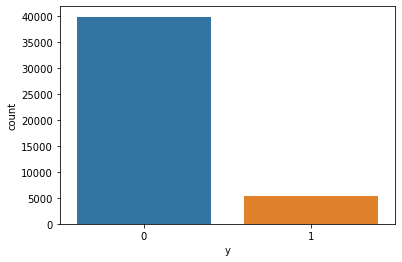

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='y',data=bank)
plt.show()

## encode columns to numeric

In [18]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in bank.columns:
    le = LabelEncoder()
    bank[column] = le.fit_transform(bank[column])

## Logistic Regression and fit model


In [19]:
classifier =LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

## Predicting  for x dataset

In [21]:
y_pred = classifier.predict(x)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
y_pred_df = pd.DataFrame({'actual' : y,
                         'predicted_prob' : y_pred})

In [24]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


## ROC Curve

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

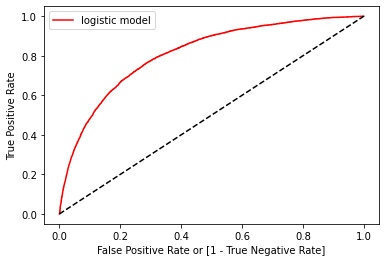

In [26]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:, 1])

auc = roc_auc_score(y, classifier.predict_proba (x)[:, 1])

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='red', label='logistic model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## AUC

In [28]:
auc

0.8117272621865994

In [29]:
#Confusion Matrix for the model accuracy

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[38986   936]
 [ 4247  1042]]


In [31]:
accuracy=((38986+1042)/(38986+1042+4247+936))*100
accuracy

88.53597575811196

In [32]:
from sklearn.metrics import classification_report

## Classification Report

In [33]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.53      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.71      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211



## Report 
## Confusion Matrix, corrected prediction=38988+1039=40027
## - Accuracy= 86%, means 86% of the client will have their subscription.